# Example 8.1 Symmetries of the Union Jack State

This notebook illustrates how the techniques developed in this paper can be used to explore the $\mathbb{Z}_2$ symmetries of the Union Jack State.

A state $|\phi\rangle$ on $n$ qubits has a **$\mathbb{Z}_2$ symmetry** if there exists a binary string $\mathbf{x}$ of length $n$ such that the operator $X^\mathbf{x} := \bigotimes_{0 \le i < n} X^{\mathbf{x}[i]}$ fixes $|\phi\rangle$.

Finding $\mathbb{Z}_2$ symmetries in quantum states is important when looking at symmetry protected topological order (SPTO). The Union Jack state is known to have 2-D SPTO. Representing hypergraph states such as the Union Jack state as XP codes makes it easy to look at symmetries because this is equivalent to examining stabilizers for the XP code and observing how they act on cellulations with open boundaries. 

We first illustrate how to determine the stabilizer generators for an XP code for the embedded state using the hypergraph algorithm of Chapter 5.

## XP Code for Union Jack State - Hypergraph Method 
The steps for creating an XP code for an embedded state representing the Union Jack State are as follows:
1. The unit cell is a square with a vertex added in the middle. We join all outer vertices to the middle vertex to create 4 triangular faces.
2. Tile an $m \times m$ plane with the square unit cells, and place qubits on each vertex. There are $n = m^2 + (m+1)^2$ **vertex qubits** in total.
3. We form the Union Jack state $|\phi\rangle$ by starting with $|+\rangle^{\otimes n}$ and applying a CCZ operator on the vertices of each triangular face in the cellulation.
4. To find the XP code corresponding to the embedded state $|\psi\rangle$, we add ancilla qubits on each edge of the cellulation (**edge qubits**) and apply the algorithm in Chapter 5. 

This process and a sample set of diagonal and non-diagonal stabilizer generators is illustrated below:

To run different scenarios click here: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/m-webster/XPFpackage/HEAD?urlpath=tree/Examples)

This code is Copyright 2021 Mark Webster, and is made available subject to [GPL licensing](https://www.gnu.org/licenses/gpl-3.0.en.html).

In [1]:
import add_parent_dir
import numpy as np
from common import *
from NSpace import *
from XPAlgebra import *
from XPCodes import *
from cellulation import *

## to save the plots to file, set save=True
save = False
## If saving, dpi specifies the resolution of the image
dpi = 120
## m is the number of unit cells on each edge
m = 6
## if torus = True, embed onto a torus
torus = False

#### UNION JACK STATE USING HYPERGRAPH ALGORITHM ####
## first make a celluation of the m x m square plane
o,r,c = (1,1),m,m
faces = tri_square_plane(o,r,c)
g = Cellulation(faces)
if torus:
    g = Torus(g)

## Union Jack State is defined on each 2D face of the cellulation
## The first approach is to define a hypergraph state which has a CCZ on vertices 0,1,2 of each face
Edges = [(0,1,2)]

## We apply the hypergraph state to the cellulation to obtain a set of edges and weights
E,W = applyWeightedGraph(g,Edges)
## We then create a graphState object from the edges and weights
GState = graphState(E,W)
## The graphState object allows us to find the stabilizer generators G, precision N and number of qubits n
## for an embedded state representing the hypergraph state
G,N,n = GState.XPCode(),GState.N,GState.n
g.SX2cell(GState.SXx)
## We now display a sample of some of the stabilizer generators
g.display(save=save,dpi=dpi,show_qubits=False,show_operator=[G[0],G[28],G[52],G[11],G[38],G[270],G[148]],title='Embedded Hypergraph State - Sample Generators')

## canonical generators
S1 = CanonicalGenerators(G,N)

<Figure size 640x480 with 1 Axes>

The coloured dots in the diagram above correspond to operators of the following kinds being applied to each qubit:
- **Grey**: Pauli $X$ operator
- **Yellow**: Pauli $Z$ operator
- **Red**: $S$ operator
- **Blue**: $S^3$ operator

### Diagonal Stabilizer Generators - Hypergraph Method
We see that diagonal stabilizer generators are of the following 2 types:
1. **Loop Generators**: $Z$ operators on each edge qubit for enclosed loops
2. **Vertex-to-Vertex Generators**: $Z$ operators on 2 vertex qubits, as well as the edge qubits connecting them

### Non-Diagonal Stabilizer Generators - Hypergraph Method
Each non-diagonal stabilizer generator is centred on a vertex qubit. For generators in the bulk, there is an $X$ operator on the control qubit and connecting edges. There is a $Z$ operator on the vertices connected by an edge to the vertex qubit. There are $S^3$ operators on each edge connecting the vertex qubits with $Z$ operators on them. Non-diagonal stabilizers can either be square or diamond shaped, depending whether the central qubit is in the middle of a sqaure or on the boundary of a square.

Diamond-shaped generators centred on qubits on the boundary are slightly different. For qubits on the boundary, if we would  apply a $Z$ operator according to the above rule, we instead apply an $S$ operator.

We can tile the plane 3 different ways using non-diagonal stabilizer generator centred on 3 different types of vertex qubits. Tilings for each class of qubit only overlap on the stabilizer boundaries (which only support diagonal operators):
1. **Control Qubits**: qubits in the centre of squares in the cellulation
2. **SW Qubits**: qubits on the South-West and North-East corners of alternating squares starting from SW corner square
3. **NW Qubits**: qubits on the North-West and South-East corners of alternating squares

We will show that there is a $\mathbb{Z}_2$ symmetry associated with each of these classes of qubit. The different classes are illustrated below: 

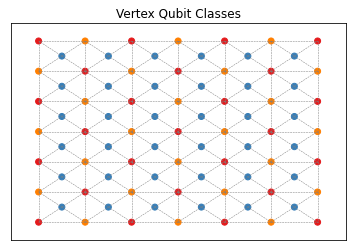

In [2]:
# ## Here we display the Z_2 symmetries of the Union Jack State
# ## There are 3 classes of qubits - SW, NW and Control
qClasses = ['SW','NW','Control']
vClass = UJVertexClasses(g)
QList = [vClass[0],vClass[2],vClass[1] + vClass[3]]
for i in range(3):
    QList[i] = [g.cell2index[v] for v in QList[i]]

## z is initially all zero
z = ZMatZeros(n)
## label for each class of vertex qubit
for i in range(3):
    ## update z
    z += (i+1) * set2Bin(n,QList[i])
## make an XP operator A with Z component z, and p, x components zero
A = makeXP(0,0,z)
## plot the XP operator A
g.display(save=save,dpi=dpi,show_qubits=False,show_operator=[A],title='Vertex Qubit Classes')

In the above diagram, control qubits are blue, SW qubits are red and NW qubits are yellow.

## Modified Stabilizer Generators for Union Jack State
We now illustrate modified versions of the stabilizers for the Union Jack state which make it straightforward to see the $\mathbb{Z}_2$ symmetries of the Union Jack State. We require that the modified stabilziers generate the same XP group as the embedded Hypergraph stabilizer generators.

### Diagonal Stabilizer Generators
We can generate all possible diagonal stabilizer generators by considering each triangular face of the celluation and constructing the following operators:
1. **$1 \times$ Face generator**: for the edges making up the triangle, apply $Z$ operators on each edge qubit. All closed loop operators can be generated using these operators.
2. **$3 \times$ Edge generators**: for each edge of the triangle, apply $Z$ operators on the 2 vertex qubits, as well as the edge qubit joining them. All vertex-to-vertex operators can be generated using Face and Edge generators.

### Non-Diagonal Stabilizer Generators
We can eliminate all $Z$ operators from the non-diagonal stabilizers by applying alternating edge generators to the boundaries. There are 2 different ways of doing this, based on which edge we start on. For diamond-shaped generators, we apply the edge generators the same way each time and by doing this, we can ensure that on the boundaries of adjacent generators of the same class, $S$ operators always line up with $S^3$ operators and so cancel. 

For square-shaped generators, we create a checkerboard pattern by alternating the way the edge generators are applied and this again ensures that $S$ and $S^3$ operators line up on the boundaries of adjacent square generators.

Below is a diagram illustrating the modified generators. 

We also calculate and compare the canonical generators of the stabilizer generators for the two different methods and verify that they generate the same XP group:


Check that Canonical Generators are Equal for both methods: S1 == S2 True


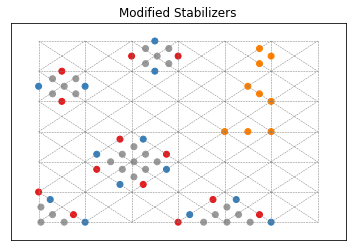

In [3]:
#### UNION JACK STATE - DIRECT CALCULATION OF STABILIZER GENERATORS ####
## Modified version of stabilizers make it easier to see the symmetries for open boundaries

g = Cellulation(faces)
if torus:
    g = Torus(g)

G,N = union_jack_code(g)
## canonical generators
S2 = CanonicalGenerators(G,N)
print('Check that Canonical Generators are Equal for both methods: S1 == S2',np.all(np.isclose(S1,S2)))

## display a sample set of generators
g.display(save=save,dpi=dpi,show_qubits=False,show_operator=[G[0],G[28],G[52],G[11],G[38],G[399],G[412],G[203]],title='Modified Stabilizers')



## Symmetries for Cellulation of the Plane

We can check for symmetries of the plane easily by multiplying non-diagonal stabilizer generators centred on each different class of vertex qubit. Note that this cellulation has open boundaries.

We see that the symmetries based on the SW and NW vertex qubits are preserved on the $m \times m$ plane with open boundaries, and hence are also preserved on closed boundaries (eg on a torus).

In the case of the symmetry based on the control qubits, the symmetry is not preserved on the boundary of the plane. We can easily see that folding the plane into a torus would match $S$ with $S^3$ operators which means that the symmetry would be preserved on a torus and hence closed boundaries. The situation is the same for the global onsite symmetry formed by multiplying together generators based on all 3 classes of vertex qubit.

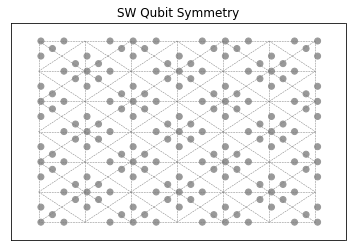

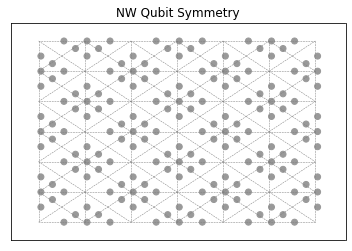

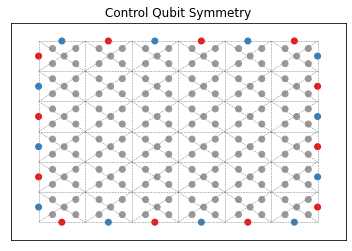

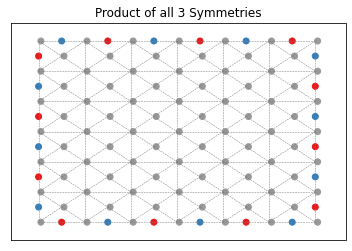

In [4]:
## we make Symmetry operators by multiplying together the non-diagonal stabilizer generators
## centred on all qubits of a given class
SymmOps = []
SX,SZ = splitDiag(G)
n = XPn(SX)
for i in range(3):
    u = set2Bin(n,QList[i])
    A = GeneratorProduct(SX,u,N)
    SymmOps.append(A)
    g.display(save=save,dpi=dpi,show_operator=A,title=qClasses[i] + ' Qubit Symmetry')

# ## Now display the product of all 3 symmetries
A = XPMul(SymmOps[0],SymmOps[1],N)
B = XPMul(A,SymmOps[2],N)
g.display(save=save,dpi=dpi,show_operator=B,title='Product of all 3 Symmetries')



## Bulk Symmetries
In this section, we look at symmetries on the bulk. To determine these, we multiply together all non-diagonal stabilizer generators centred on each class of vertex qubit, but exclude those generators centred on qubits on the boundary.

The bulk symmetries are illustrated below and demonstrate that they are preserved on the bulk, but need to be modified by diagonal operators on the boundary. This is an indicator of Symmetry Protected Topological Order (SPTO).

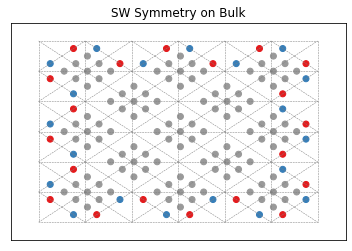

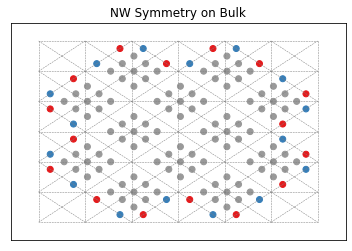

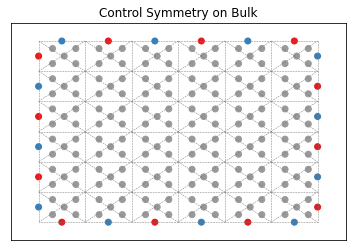

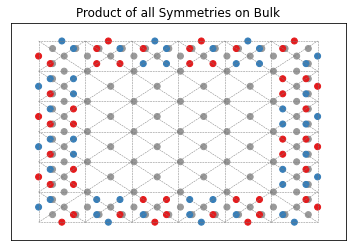

In [5]:
## We now consider the Symmetries restricted to the bulk
## The easiest way to see these is to calculate the product of the non-diagonal stabilizers 
## but exclude those centred on qubits on the boundary

## Boundary Qubits
Bdy = g.boundary()
if len(Bdy) > 0:
    boundaryQubits = {g.cell2index[a] for a in Bdy[0] }
    B = None
    ## there are no Control qubits on the boundary, so just look at each of the SW and NW classes
    for i in range(3):
        u = set2Bin(n,set(QList[i]).difference(boundaryQubits))
        H = GeneratorProduct(SX,u,N)
        g.display(save=save,dpi=dpi,show_operator=H,title=qClasses[i] + ' Symmetry on Bulk')
        B = H if B is None else XPMul(B,H,N)
    ## Now we display the product of all non-diagonal stabilziers centred on qubits on the boundary
    g.display(save=save,dpi=dpi,show_operator=B,title='Product of all Symmetries on Bulk')